파이썬 딥러닝 텐서플로 ch3.4, 6 ~ 7 87p ~ 95p, 105p ~115p

---

## 04 모델 세부 설정

In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터 로드
mnist=tf.keras.datasets.mnist

# load_data()로 데이터 로드
(x_train, y_train), (x_test, y_test)=mnist.load_data()

# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

# 데이터 정규화
x_train=x_train/x_train.max()
x_test=x_test/x_test.max()

11490434/11490434 [==============================] - 0s 0us/step
train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


### 4-1 초기값 설정
- Dense 레이어는 기본 초기화 방법으로 `Glorot Uniform` 초기화 방법 설정

In [2]:
dense=tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

- 초기화 방법을 HeNormal로 변경하기 위해서는 `kernel_initializer` 매개변수에 설정
 - 문자열로 지정하는 방법, 클래스 인스턴스로 지정하는 방법이 있음.



In [3]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer = he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}
{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}


케라스에서 지원하는 초기화 목록
- glorot_normal, glorot_uniform : 글로럿 초기화(Xavier 초기화)
- lecun_normal, lecun_uniform : Yann Lecun 초기화
- he_normal, he_uniform : He 초기화
- random_normal, random_uniform : 정규 분포, 연속균등 분포 초기화

### 4-2 규제(Regularization)
- 모델의 과대적합을 해소하기 위해 L1, L2 규제 적용
- 기본값 : 규제X

In [4]:
# 기본값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

규제를 적용하기 위해서는 `kernel_regularizer`에 규제 지정

In [5]:
# L1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


### 4-3 드롭아웃(Dropout)
- 딥러닝 모델의 층이 넓고 깊어질 때 모델은 훈련에 주어진 샘플에 과하게 적합하도록 학습하는 경향 -> 과대적합 문제

- 드롭아웃 : 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어. 노드의 일부 신호를 임의로 삭제

- 모델이 훈련할 때는 드롭아웃이 적용되어 노드 중 일부만 훈련하게 되지만, 예측 시점에는 모든 노드들 활용된다

- Dropout 레이어 함수에 입력하는 숫자 : 노드에서 제거되는 비율

In [6]:
# Dropout 25% 비율 적용 (25% 노드가 삭제)
tf.keras.layers.Dropout(0.25)

### 4-4 배치 정규화(Batch Normalization)
- 배치 정규화 : 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일 정규화 -> 안정적인 훈련 가능. 성능 크게 향상

- 별도로 코드 구현할 필요x. 클래스 인스턴스 생성하여 추가

In [7]:
# model A: Dense+ReLu
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# model B: Dense+BatchNorm + ReLU
model_b=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 여기서 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

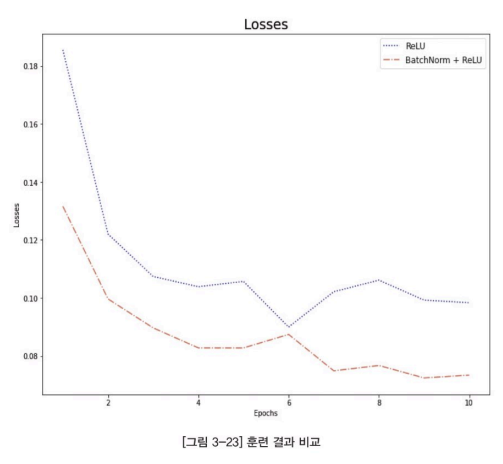

- 배치 정규화만 추가하였는데 손실은 이전 대비 더 안정적이고 빠르게 수렴

### 4-5 활성화(activation) 함수
- 주로 Dense 레이어에 ReLU 활성화 함수 지정.

- 활성화 함수 적용 시, 클래스 인스턴스로 선언하여 하이퍼파라미터 값 변경하여 적용 가능

In [9]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [10]:
# model C: Dense + BatchNorm + LeakyReLU(0,2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 여기서 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 (LeakyReLU, alpha=0.2) 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])

model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

- 3개 모델 훈련 후 수렴 속도 확인
 - model_a : Dense 레이어 + ReLU 활성화 함수
 - model_b : Dense 레이어 + 배치 정규화
 - model_c : Dense 레이어 + 배치 정규화 + LeakyReLU(0.2) 활성화 함수

In [11]:
model_a.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A : Dense + ReLU
history_a=model_a.fit(x_train, y_train,
                      validation_data = (x_test, y_test), epochs=10)
# Model B : Dense + BatchNorm + ReLU
history_b=model_b.fit(x_train, y_train,
                      validation_data = (x_test, y_test), epochs=10)
# Model C : Dense + BatchNorm + LeakyReLU(0,2)
history_c=model_c.fit(x_train, y_train,
                      validation_data = (x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2897 - accuracy: 0.9163 - val_loss: 0.1536 - val_accuracy: 0.9552
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1373 - accuracy: 0.9591 - val_loss: 0.1149 - val_accuracy: 0.9659
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1018 - accuracy: 0.9696 - val_loss: 0.1068 - val_accuracy: 0.9668
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0807 - accuracy: 0.9750 - val_loss: 0.0990 - val_accuracy: 0.9707
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0674 - accuracy: 0.9790 - val_loss: 0.1086 - val_accuracy: 0.9703
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0565 - accuracy: 0.9821 - val_loss: 0.0825 - val_accuracy: 0.9755
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0484 - accuracy: 0.9847 - val_loss: 0.0891 - val_accura

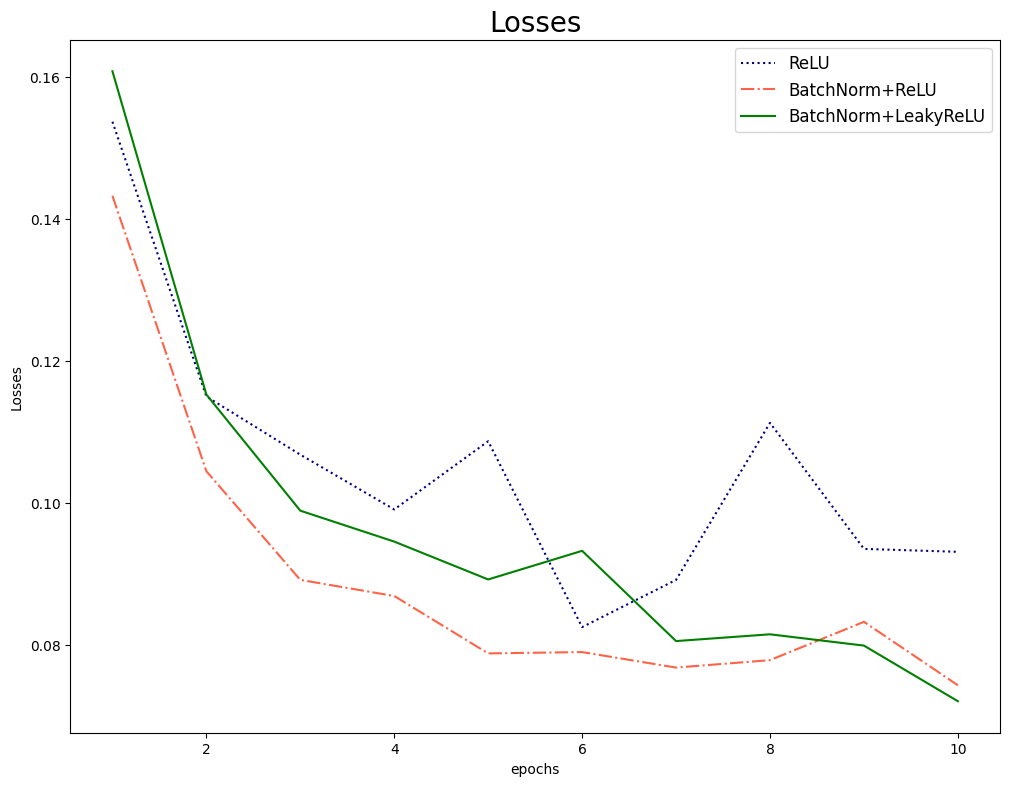

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm+ReLU', 'BatchNorm+LeakyReLU'], fontsize=12)
plt.show()

- 모델별 차이가 크지는 않다.

## 06 모델 저장 및 불러오기

### 6-1 모델을 파일로 저장
- save() 메소드 : 훈련을 종료하여 가중치가 업데이트된 모델 인스턴스 저장

- 호출할 때 저장할 파일의 디렉토리를 포함하는 파일명을 매개변수로 지정
- 저장 형식 : HDF5 포맷, SavedModel 포맷
- .h5 확장자 포함하는 경우 HDF5 포맷으로 저장. 대용량 저장

In [13]:
# 모델명을 h5 포맷으로 저장
model_b.save('h5-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 6-2 저장된 모델 복원
- `tensorflow.keras.models.load_model()` 메소드 : 저장된 모델 복원



In [14]:
#모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

모델 검증 : 복원 잘 되었는지 확인. evaluate 함수에 대입

In [15]:
# 모델 검증
loss, acc=h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.07428, acc: 0.97840


.h5 확장자 생략하면 SavedModel 포맷으로 저장

In [16]:
# 모델을 SavedModel 포맷으로 저장
model_b.save('saved-model')

In [17]:
# 모델 복원
saved_model=tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

SavedModel형식과 HDF5 형식으로 저장 및 복원된 모델들은 동일한 성능을 나타낸다.

In [18]:
# 모델 검증 (HDF5 포맷)
loss, acc=h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

# 모델 검증 (SavedModel 포맷)
loss, acc=saved_model.evaluate(x_test, y_test, verbose= 0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.07428, acc: 0.97840
saved_model] loss: 0.07428, acc: 0.97840


## 07. 복잡한 모델 생성

### 7-1 함수형 API(Functional API)
- Functional API : 복잡한 구조의 모델 정의 가능

- Sequential API : 단방향의 Sequential 모델만 구현가능. 데이터 흐름이 특정 레이어를 건너뛰거나, 병합 및 분리하는 등의 구조의 모델 구현할 수는 없다

- 함수형 API 사용하기 위해서는 Input 레이어 정의 -> 데이터의 입력 shape 정의 -> 레이어마다 반환하는 출력 값을 변수에 저장한 뒤 다음 레이어의 입력으로 연결

In [19]:
import tensorflow as tf

# 모델의 레이어를 체인 구조로 연결 input 레이어 정의
input_layer=tf.keras.Input(shape=(28, 28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1=tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2=tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3=tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4=tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

- 레이어마다 `name` 매개변수로 이름 부여할 수 있음.

In [20]:
# 모델 생성
func_model=tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- inputs 매개변수로 입력층인 input_layer 지정, outputs 매개변수에 출력층 지정, name 매개변수에 이름 지정

복잡한 구조를 갖는 모델은 `plot_model` 모듈 활용하여 모델 구조도 시각화

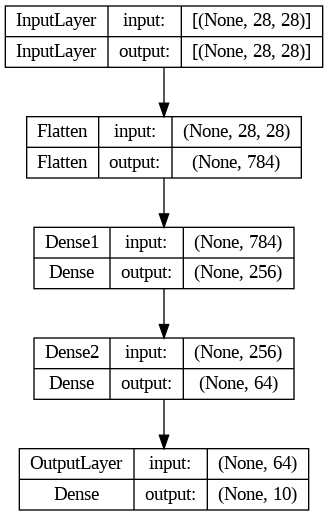

In [21]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

- show_shapes = True : 데이터의 입출력 shape 출력
- show_layer_names = True : 레이어의 이름 출력
- to_file : 파일명 입력하면 이미지 파일로 저장

함수형 API도 Sequential API와 동일한 방식으로 훈련

In [22]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc=func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2132 - accuracy: 0.9366
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0873 - accuracy: 0.9731
Epoch 3/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0608 - accuracy: 0.9808
Functional Model] loss: 0.07740, acc: 0.97670


### 7-2 모델 서브클래싱(Model Subclassing)
- Model 클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델 만들 수 있다
- Model Subclassing으로 모델 인스턴스 생성하기 위해서는 tf.keras.Model 상속받아 생성하고자 하는 모델 클래스 구현
 - 모델의 init()함수에 레이어 정의하고, 레이어의 하이퍼파라미터 정의

In [23]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(256, activation='relu')
    self.dense2=tf.keras.layers.Dense(64, activation='relu')
    self.dense3=tf.keras.layers.Dense(10, activation='softmax')

  # method overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

- `call()` 함수 : fit() 메소드가 호출되어 훈련하는 경우 호출될 함수
 - 순전파 정의하고 함수형 API와 같은 방식으로 모든 레이어를 체인처럼 연결. 최종 출력 값 return

In [24]:
# 모델 생성
mymodel=MyModel()

# 모델의 이름 설정
mymodel._name='subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_15 (Dense)            multiple                  200960    
                                                                 
 dense_16 (Dense)            multiple                  16448     
                                                                 
 dense_17 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- mymodel 변수에 바로 summary()로 요약 출력 불가
- Input 레이어와 함께 shape 정의해줘야 모델 요약 확인 가능

In [25]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc=mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2148 - accuracy: 0.9363
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0868 - accuracy: 0.9727
Epoch 3/3
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0585 - accuracy: 0.9813
Subclassing Model] loss: 0.07759, acc: 0.97670


- Model Subclassing으로 생성된 모델도 동일하게 훈련, 검증 가능.
- 모델을 생성하는 방식의 차이가 있을 뿐

### 7-3 서브클래싱 모델 파라미터를 활용한 생성
- Model Subclassing 생성의 장점 : 생성자 파라미터로 모델 내부 레이어의 하이퍼파라미터 지정할 수 있다



모델 생성자 파라미터 추가해 동적으로 레이어의 유닛 개수 초기화

In [26]:
class MyModel(tf.keras.Model):

  # 생성자 파라미터 추가
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(units, activation='relu')
    self.dense2=tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3=tf.keras.layers.Dense(num_classes, activation='softmax')

  # class overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

기준이 되는 unit의 개수 입력받아 Dense 레이어의 유닛 개수 계산하여 설정

In [27]:
# 모델 생성
mymodel=MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  200960    
                                                                 
 dense_19 (Dense)            multiple                  16448     
                                                                 
 dense_20 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- summary 결과 확인시 동적으로 설정한 레이어의 파라미터 초기화되었음을 알 수 있음.

In [28]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc=mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w.parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2100 - accuracy: 0.9380
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0869 - accuracy: 0.9733
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0611 - accuracy: 0.9807
Subclassing Model w.parameters] loss: 0.07827, acc: 0.97470
